## <b> Main Program. <b>

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re 

Reading data for Times of India.

In [2]:
df1 = pd.read_csv('Publications/TOI.csv')
df1.head(5)

,publish_date,headline_category,headline_text
0,20200101,city.ludhiana,Punjab: Congress government to allow anti-CAA ...
1,20120624,india,NCPCR seeks explanation from Haryana govt
2,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...
3,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday
4,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...


Reading data for Quint.

In [3]:
df2 = pd.read_csv('Publications/QT.csv')
df2.head(5)

,author,content,date,tag,title,url,website
0,The Quint,"Tulsi Gabbard, the first Hindu lawmaker from H...",2018-11-13,Tulsi Gabbard,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,https://www.thequint.com/news/world/tulsi-gabb...,quint
1,Pushpesh Pant,Swami Vivekananda ranks among the highest in t...,2018-07-03,"Swami Vivekananda,Hinduism,Tolerance,Politics ...",Swami Vivekananda’s 156th Birth Anniversary 20...,https://www.thequint.com/voices/opinion/swami-...,quint
2,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint
3,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint
4,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint


Reading data for First Post.

In [4]:
df3 = pd.read_csv('Publications/FP.csv')
df3.head(5)

,author,content,date,tag,title,url,website
0,Asian News International,Wanaparthy (Telangana): Union Home Minister Ra...,2018-11-29,"14th Finance Commission,Andhra Pradesh,Assembl...",Telangana Assembly polls: Rajnath Singh accuse...,https://www.firstpost.com/politics/telangana-a...,firstpost
1,Press Trust of India,Chief Minister Arvind Kejriwal on Wednesday or...,2018-11-29,"AAP,Arvind Kejriwal,BJP,Delhi,Imran Hussain,Mo...",Arvind Kejriwal orders suspension of Delhi foo...,https://www.firstpost.com/politics/arvind-kejr...,firstpost
2,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost
3,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost
4,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost


Columns in datasets.

In [5]:
df1.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [6]:
df2.columns

Index(['author', 'content', 'date', 'tag', 'title', 'url', 'website'], dtype='object')

In [7]:
df3.columns

Index(['author', 'content', 'date', 'tag', 'title', 'url', 'website'], dtype='object')

# Data Preprocessing.

Remove punctuations and special characters.

In [8]:
def rm_puncs(sen):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in sen:  
        if ele in punc:  
            sen = sen.replace(ele, " ") 
    return sen

Removing non english characters.

In [9]:
def rm_noneng(sen): 
    test_list = word_tokenize(sen)
    res = [idx for idx in test_list if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx)]   
    return res

Removing stopwords.

In [10]:
def rm_stopwords(sen):
    stop_words = set(stopwords.words('english'))  
    filtered = [w for w in sen if not w in stop_words] 
    filtered = []  
    for w in sen: 
        if w not in stop_words: 
            filtered.append(w) 
    return filtered

Showing data preprocessing for two datasets in New York Times.

In [11]:
heading = df1['headline_text']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    print(s3,"\n\n") 

['Punjab', 'Congress', 'government', 'allow', 'anti', 'CAA', 'protest', 'today'] 


['NCPCR', 'seeks', 'explanation', 'Haryana', 'govt'] 




Showing data preprocessing for two datasets in Atlantic.

In [12]:
content = df2['content']
heading = df2['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['Tulsi', 'Gabbard', 'Hindu', 'War', 'Veteran', 'US', 'Lawmaker', 'May', 'Run', 'Presidency'] 


['Tulsi', 'Gabbard', 'first', 'Hindu', 'lawmaker', 'Hawaii', 'US', 'Congress', 'considering', 'run', 'American', 'presidency', '2020', 'according', 'sources', 'close', 'On', 'Friday', '9', 'November', 'Medtronic', 'conference', 'Los', 'Angeles', 'eminent', 'Indian', 'American', 'Dr', 'Sampat', 'Shivangi', 'introduced', 'Gabbard', '37', 'said', 'could', 'next', 'president', 'US', '2020', 'The', 'brief', 'statement', 'marked', 'standing', 'ovation', 'presence', 'four', 'term', 'Congresswoman', '50th', 'US', 'State', 'Gabbard', 'Democrat', 'confirm', 'would', 'running', 'president', '2020', 'deny', 'either', 'Tulsi', 'Gabbard', 'American', 'politician', 'Democratic', 'Party', 'serving', 'US', 'Representative', 'Hawaii', 's', '2nd', 'congressional', 'district', 'since', '2013', 'Gabbard', 'represents', 'constituency', 'Hawaii', 'Indian', 'descent', 'neither', 'parents', 'Hindu', 'practises', 'H

Showing data preprocessing for two datasets in The Guardian.

In [13]:
content = df3['content']
heading = df3['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['Telangana', 'Assembly', 'polls', 'Rajnath', 'Singh', 'accuses', 'TRS', 'chief', 'K', 'Chandrashekar', 'Rao', 'stoking', 'fear', 'minorities'] 


['Wanaparthy', 'Telangana', 'Union', 'Home', 'Minister', 'Rajnath', 'Singh', 'Thursday', 'said', 'Caretaker', 'chief', 'minister', 'K', 'Chandrashekar', 'Rao', 'Telangana', 'Rashtra', 'Samithi', 'TRS', 'brewing', 'fear', 'among', 'minority', 'communities', 'Bharatiya', 'Janata', 'Party', 'BJP', '``', 'Do', 'n', 't', 'create', 'fear', 'among', 'minorities', 'taking', 'BJP', 's', 'name', 'We', 'n', 't', 'politics', 'based', 'caste', 'creed', 'religion', 'BJP', 'committed', 'empowerment', 'Rajnath', 'said', 'addressing', 'public', 'rally', 'ahead', 'Assembly', 'elections', 'poll', 'bound', 'Telangana', 'Taking', 'TRS', 'government', 'Rajnath', 'said', '``', 'They', 'failed', 'development', 'front', 'hence', 'trying', 'divert', 'attention', 'issue', 'minority', 'reservation', 'How', 'reservation', 'given', 'minorities', 'without', 'curtailing', 

# K Means Clustering.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle
import os.path
from os import path

K Means Clustering.

In [15]:
def kclust_elb(heading,filename):
    vectorizer = TfidfVectorizer(stop_words='english',analyzer = 'word')
    X = vectorizer.fit_transform(heading1)
    cost =[]
    for i in range(1,22):
        model = KMeans(n_clusters=i,max_iter=500)
        model.fit(X)
        cost.append(model.inertia_)
    plt.plot(range(1, 22), cost, color ='g', linewidth ='3') 
    plt.xlabel("Value of K") 
    plt.ylabel("Sqaured Error (Cost)") 
    plt.savefig(filename,facecolor = 'yellow')
    plt.show()

### For Times of India.

In [16]:
heading1 = np.array(df1['headline_text'])
if(path.exists('Models/KMeans/M1')):
    model1 = pickle.load(open("Models/KMeans/M1", "rb"))
else:
    kclust_elb(heading1,'Plots/KMeans/M1.png')

In [17]:
heading1 = np.array(df1['headline_text'])
if(path.exists('Models/KMeans/M1')):
    model1 = pickle.load(open("Models/KMeans/M1", "rb"))
else:
    vectorizer = TfidfVectorizer(stop_words='english',analyzer = 'word')
    X1 = vectorizer.fit_transform(heading1)
    model1 = KMeans(n_clusters = 16,verbose = 0,algorithm ='auto')
    model1.fit(X1)
    pickle.dump(model1, open("Models/KMeans/M1", 'wb'))

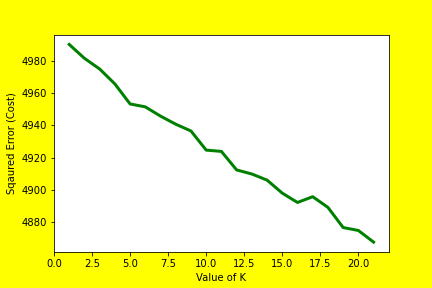

In [18]:
l1 = model1.labels_
df1["Label"] = l1
df1.to_csv("Publications/Edit/KMeans/TOI.csv", index=False)

0 - Left - Congress and Allies. <br>
1 - Right - Policing. <br>
2 - Right - Govt vs Terrorism. <br>
3 - Right - Government Criticism. <br>
4 - Right - Govt Policies. <br>
5 - Right - Common Problems. <br>
6 - Right - Internal Matters. <br>
7 - Left - Opposition crackdown. <br>
8 - Right - Law. <br>
9 - Right - Govt Programs. <br>
10 - Right - Finance Policies. <br>
11 - Right - Foreign Policies. <br>
12 - Right - Education Policy. <br>
13 - Right - Attacks on people. <br>
14 - Right - Indian Army and Business.<br>
15 - Outliers.<br>

In [19]:
k = []
for label in df1['Label']:
    if label == 0 or label == 7:
        k.append(0)
    elif label == 15:
        k.append(-1)
    else:
        k.append(1)
df1['Party'] = k
df1.to_csv("Publications/Edit/KMeans/TOI.csv",index=False)

### For Quint.

In [20]:
heading2 = np.array(df2['title'].values.astype('U'))
if(path.exists('Models/KMeans/M2')):
    model2 = pickle.load(open("Models/KMeans/M2", "rb"))
else:
    kclust_elb(heading1,'Plots/KMeans/M2.png')

In [21]:
heading2 = np.array(df2['title'].values.astype('U'))
if(path.exists('Models/KMeans/M2')):
    model2 = pickle.load(open("Models/KMeans/M2", "rb"))
else:
    vectorizer = TfidfVectorizer(stop_words='english',analyzer = 'word')
    X2 = vectorizer.fit_transform(heading2)
    model2 = KMeans(n_clusters = 9,verbose = 0,algorithm ='auto')
    model2.fit(X2)
    pickle.dump(model2, open("Models/KMeans/M2", 'wb'))

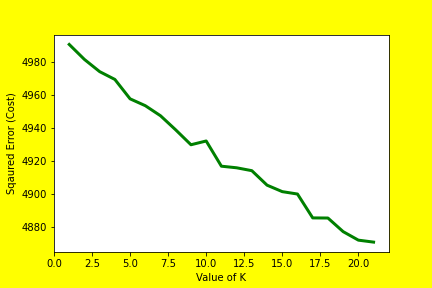

In [22]:
l2 = model2.labels_
df2["Label"] = l2
df2.to_csv("Publications/Edit/KMeans/QT.csv",index=False)

0 - Right - Hinduism vs other religions. <br>
1 - Right - BJP. <br>
2 - Right - Modi. <br>
3 - Left - Gandhi family. <br>
4 -  Left - DMK and Mamta Banerjee. <br>
5 -  Right - RSS. <br>
6 - Left - Congress and Allies. <br>
7 - Right - BJP and elections. <br>
8 - Right - Govt Policies. <br>

In [23]:
k = []
for label in df2['Label']:
    if label == 3 or label == 4 or label == 6:
        k.append(0)
    else:
        k.append(1)
df2['Party'] = k
df2.to_csv("Publications/Edit/KMeans/QT.csv",index=False)

### For The First Post.

In [24]:
heading3 = np.array(df3['title'].values.astype('U'))
if(path.exists('Models/KMeans/M3')):
    model3 = pickle.load(open("Models/KMeans/M3", "rb"))
else:
    kclust_elb(heading1,'Plots/KMeans/M3.png')   

In [25]:
heading3 = np.array(df3['title'].values.astype('U'))
if(path.exists('Models/KMeans/M3')):
    model3 = pickle.load(open("Models/KMeans/M3", "rb"))
else:
    X3 = vectorizer.fit_transform(heading3)
    model3 = KMeans(n_clusters = 15,verbose = 0,algorithm = 'auto')
    model3.fit(X3)
    pickle.dump(model3, open("Models/KMeans/M3", 'wb'))

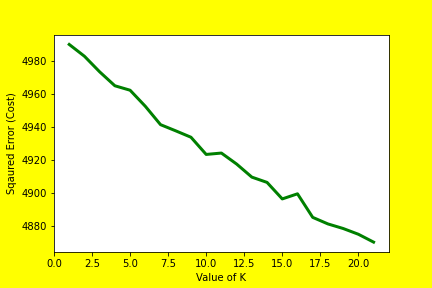

In [26]:
l3 = model3.labels_
df3["Label"] = l3
df3.to_csv("Publications/Edit/KMeans/FP.csv", index=False)

0 - Left - AAP. <br>
1 - Right - J&K. <br>
2 - Left - Shiv Sena and NCP . <br>
3 - Left - TDP. <br>
4 - Right - AIADMK. <br>
5 - Left - TRS. <br>
6 - Right - Modi. <br>
7 - Right - Anti BJP claims. <br>
8 - Right - BJP in MP. <br>
9 - Left - JDS. <br>
10 - Right - NDA in Bihar. <br>
11 - Left - Anti BJP. <br>
12 - Right - Amit Shah. <br>
13 - Left - Rahul Gandhi. <br>
14 - Right - Elections and BJP. <br>

In [27]:
k = []
for label in df3['Label']:
    if label == 0 or label == 2 or label == 3 or label == 5 or label == 9 or label == 11 or label == 13:
        k.append(0)
    else:
        k.append(1)
df3['Party'] = k
df3.to_csv("Publications/Edit/KMeans/FP.csv",index=False)

# Sample dataset creation

In [28]:
df = pd.read_csv('Publications/TOI.csv')
df1 = df[1:1000]
df1.head()

,publish_date,headline_category,headline_text
1,20120624,india,NCPCR seeks explanation from Haryana govt
2,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...
3,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday
4,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...
5,20090824,city.mysuru,Assembly session will focus on people's proble...


In [29]:
df = pd.read_csv('Publications/QT.csv')
df2 = df[1:1000]
df2.head()

,author,content,date,tag,title,url,website
1,Pushpesh Pant,Swami Vivekananda ranks among the highest in t...,2018-07-03,"Swami Vivekananda,Hinduism,Tolerance,Politics ...",Swami Vivekananda’s 156th Birth Anniversary 20...,https://www.thequint.com/voices/opinion/swami-...,quint
2,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint
3,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint
4,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint
5,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint


In [30]:
df = pd.read_csv('Publications/FP.csv')
df3 = df[1:1000]
df3.head()

,author,content,date,tag,title,url,website
1,Press Trust of India,Chief Minister Arvind Kejriwal on Wednesday or...,2018-11-29,"AAP,Arvind Kejriwal,BJP,Delhi,Imran Hussain,Mo...",Arvind Kejriwal orders suspension of Delhi foo...,https://www.firstpost.com/politics/arvind-kejr...,firstpost
2,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost
3,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost
4,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost
5,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost


# DBSCAN Clustering

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [32]:
def dbs(heading,t_eps):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(heading)
    model = DBSCAN(eps = t_eps,min_samples = 3, metric = 'euclidean')
    model.fit(X)
    return model  

In [33]:
def opt_eps(heading,filename):
    neigh = NearestNeighbors(n_neighbors=2)
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(heading)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel("Distance") 
    plt.ylabel("Eps value") 
    plt.savefig(filename,facecolor = 'yellow')
    plt.show()

### For Times of India.

In [34]:
heading11 = np.array(df1['headline_text'].values.astype('U'))
if(path.exists('Models/DBS/M1')):
    model11 = pickle.load(open("Models/DBS/M1", "rb"))
else:
    opt_eps(heading11,'Plots/DBS/M1.png')

In [35]:
heading11 = np.array(df1['headline_text'].values.astype('U'))
t_eps = 1
if(path.exists('Models/DBS/M1')):
    model11 = pickle.load(open("Models/DBS/M1", "rb"))
else:
    X11 = vectorizer.fit_transform(heading3)
    model11 = dbs(heading11,t_eps)
    pickle.dump(model11, open("Models/DBS/M1", 'wb'))

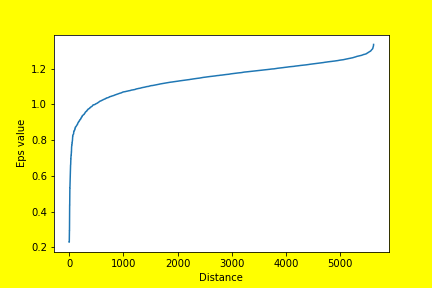

In [36]:
l1 = model11.labels_
df1["Label"] = l1
df1.to_csv("Publications/Edit/DBS/TOI.csv", index=False)

-1 - Left. <br>
0 - Right. <br>

In [37]:
k = []
for label in df1['Label']:
    if label == 0:
        k.append(0)
    else:
        k.append(1)
df1['Party'] = k
df1.to_csv("Publications/Edit/DBS/TOI.csv",index=False)

### For Quint.

In [38]:
heading22 = np.array(df2['title'].values.astype('U'))
if(path.exists('Models/DBS/M2')):
    model11 = pickle.load(open("Models/DBS/M2", "rb"))
else:
    opt_eps(heading22,'Plots/DBS/M2.png')

In [39]:
heading22 = np.array(df2['title'].values.astype('U'))
t_eps = 1
if(path.exists('Models/DBS/M2')):
    model22 = pickle.load(open("Models/DBS/M2", "rb"))
else:
    X22 = vectorizer.fit_transform(heading22)
    model22 = dbs(heading22,t_eps)
    pickle.dump(model22, open("Models/DBS/M2", 'wb'))

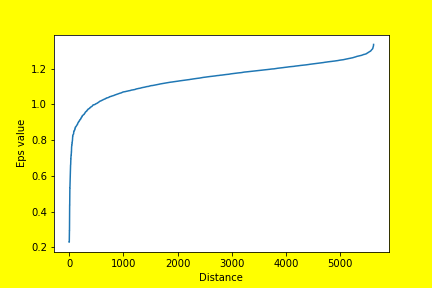

In [40]:
l2 = model22.labels_
df2["Label"] = l2
df2.to_csv("Publications/Edit/DBS/QT.csv", index=False)

-1 -Left <br>
0 - Right. <br>
1 - Right. <br>
2 - Right.<br>
3 - Right. <br>
4 - Left. <br>
5 - Left. <br>

In [41]:
k = []
for label in df2['Label']:
    if label == -1 or label == 4 or label == 5:
        k.append(0)
    else:
        k.append(1)
df2['Party'] = k
df2.to_csv("Publications/Edit/DBS/QT.csv",index=False)

### For First Post.

In [42]:
heading33 = np.array(df3['title'].values.astype('U'))
if(path.exists('Models/DBS/M3')):
    model33 = pickle.load(open("Models/DBS/M3", "rb"))
else:
    opt_eps(heading33,'Plots/DBS/M3.png')

In [43]:
heading33 = np.array(df3['title'].values.astype('U'))
t_eps = 1
if(path.exists('Models/DBS/M3')):
    model33 = pickle.load(open("Models/DBS/M3", "rb"))
else:
    X33 = vectorizer.fit_transform(heading33)
    model33 = dbs(heading33,t_eps)
    pickle.dump(model33, open("Models/DBS/M3", 'wb'))

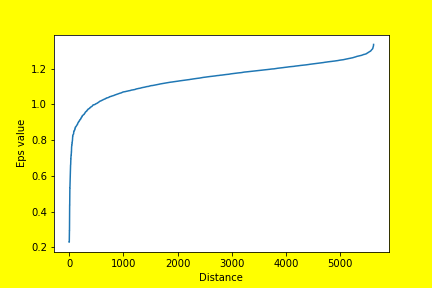

In [44]:
l3 = model33.labels_
df3["Label"] = l3
df3.to_csv("Publications/Edit/DBS/FP.csv", index=False)

<ipython-input-44-edc95204089b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Label"] = l3


-1 - Left. <br>
0 - Right. <br>

In [45]:
k = []
for label in df3['Label']:
    if label == -1:
        k.append(0)
    else:
        k.append(1)
df3['Party'] = k
df3.to_csv("Publications/Edit/DBS/FP.csv",index=False)

<ipython-input-45-d4bb1c2e5ae9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Party'] = k


# VADER Sentiment Analysis.

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [47]:
def vaders(article):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(article)
    return sentiment_dict

In [48]:
def sentiment_vader(article):
    kmax = []
    for sent in article:
        sentiment = vaders(sent)
        sentiment.pop("compound")
        kmax.append(max(sentiment, key = sentiment.get))
    return kmax

## Times of India.

### KMeans data.

In [49]:
df1 = pd.read_csv('Publications/Edit/KMeans/TOI.csv')
df1 = df1[1:1000]
df1 = df1.to_csv('Publications/Edit/KMeans/TOI_new.csv',index = False)
df1 = pd.read_csv('Publications/Edit/KMeans/TOI_new.csv')
df1.head()

,publish_date,headline_category,headline_text,Label,Party
0,20120624,india,NCPCR seeks explanation from Haryana govt,3,1
1,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0
2,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0
3,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,13,1
4,20090824,city.mysuru,Assembly session will focus on people's proble...,3,1


In [50]:
kmax = sentiment_vader(df1['headline_text'])
df1["sent1"] = kmax

In [51]:
df1.to_csv("Publications/Edit/KMeans/TOI_new.csv", index=False)

In [52]:
df1['sent1'].value_counts()

neu    910
neg     57
pos     32
Name: sent1, dtype: int64

In [53]:
df1 = pd.read_csv('Publications/Edit/KMeans/TOI_new.csv')

In [54]:
k = []
n = len(df1)
for i in range(0,n):
    party = df1['Party'][i]
    sent = df1['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0)
    elif party == -1:
        k.append(0)
df1['Bias1'] = k
df1.to_csv("Publications/Edit/KMeans/TOI_new.csv",index=False)

### DBScan data.

In [55]:
df11 = pd.read_csv('Publications/Edit/DBS/TOI.csv')
df11 = df11[1:1000]
df11 = df11.to_csv('Publications/Edit/DBS/TOI_new.csv',index = False)
df11 = pd.read_csv('Publications/Edit/DBS/TOI_new.csv')
df11.head()

,publish_date,headline_category,headline_text,Label,Party
0,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0
1,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0
2,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,0,0
3,20090824,city.mysuru,Assembly session will focus on people's proble...,0,0
4,20110801,city.ranchi,Nine die in lightning strikes,0,0


In [56]:
kmax = sentiment_vader(df11['headline_text'])
df11["sent1"] = kmax

In [57]:
df11.to_csv("Publications/Edit/DBS/TOI_new.csv", index=False)

In [58]:
df11['sent1'].value_counts()

neu    909
neg     57
pos     32
Name: sent1, dtype: int64

In [59]:
df11 = pd.read_csv('Publications/Edit/DBS/TOI_new.csv')

In [60]:
k = []
n = len(df11)
for i in range(0,n):
    party = df11['Party'][i]
    sent = df11['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0)
    elif party == -1:
        k.append(-1)
df11['Bias1'] = k
df11.to_csv("Publications/Edit/DBS/TOI_new.csv",index=False)

## Quint.

### KMeans data.

In [61]:
df2 = pd.read_csv('Publications/Edit/KMeans/QT.csv')
df2 = df2[1:1000]
df2 = df2.to_csv('Publications/Edit/KMeans/QT_new.csv',index = False)
df2 = pd.read_csv('Publications/Edit/KMeans/QT_new.csv')
df2.head()

,author,content,date,tag,title,url,website,Label,Party
0,Pushpesh Pant,Swami Vivekananda ranks among the highest in t...,2018-07-03,"Swami Vivekananda,Hinduism,Tolerance,Politics ...",Swami Vivekananda’s 156th Birth Anniversary 20...,https://www.thequint.com/voices/opinion/swami-...,quint,0,1
1,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,5,1
2,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,0,1
3,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,0,1
4,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,0,1


In [62]:
kmax = sentiment_vader(df2['content'])
df2["sent1"] = kmax

In [63]:
df2.to_csv("Publications/Edit/KMeans/QT_new.csv", index=False)

In [64]:
df2['sent1'].value_counts()

neu    999
Name: sent1, dtype: int64

In [65]:
df2 = pd.read_csv('Publications/Edit/KMeans/QT_new.csv')

In [66]:
k = []
n = len(df2)
for i in range(0,n):
    party = df2['Party'][i]
    sent = df2['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0)
    elif party == -1:
        k.append(-1)
df2['Bias1'] = k
df2.to_csv("Publications/Edit/KMeans/QT_new.csv",index=False)

### DBScan data.

In [67]:
df22 = pd.read_csv('Publications/Edit/DBS/QT.csv')
df22 = df22[1:1000]
df22 = df22.to_csv('Publications/Edit/DBS/QT_new.csv',index = False)
df22 = pd.read_csv('Publications/Edit/DBS/QT_new.csv')
df22.head()

,author,content,date,tag,title,url,website,Label,Party
0,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,-1,0
1,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,-1,0
2,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,-1,0
3,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,-1,0
4,The Quint,"Purnendu Pritam With heavy rains, thunderstorm...",2018-06-14,"Assam,United States,AIADMK,QWrap,FIFA,Anand L ...","Today’s News in Videos: Rains, Thunderstorms, ...",https://www.thequint.com/videos/news-videos/la...,quint,-1,0


In [68]:
kmax = sentiment_vader(df22['content'])
df22["sent1"] = kmax
df22.to_csv("Publications/Edit/DBS/QT_new.csv", index=False)

In [69]:
df22['sent1'].value_counts()

neu    998
Name: sent1, dtype: int64

In [70]:
df22 = pd.read_csv('Publications/Edit/DBS/QT_new.csv')

In [71]:
k = []
n = len(df22)
for i in range(0,n):
    party = df22['Party'][i]
    sent = df22['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0) 
    elif party == -1:
        k.append(-1)
df22['Bias1'] = k
df22.to_csv("Publications/Edit/DBS/QT_new.csv",index=False)

## First Post.

### KMeans data.

In [72]:
df3 = pd.read_csv('Publications/Edit/KMeans/FP.csv')
df3 = df3[1:1000]
df3 = df3.to_csv('Publications/Edit/KMeans/FP_new.csv',index = False)
df3 = pd.read_csv('Publications/Edit/KMeans/FP_new.csv')
df3.head()

,author,content,date,tag,title,url,website,Label,Party
0,Press Trust of India,Chief Minister Arvind Kejriwal on Wednesday or...,2018-11-29,"AAP,Arvind Kejriwal,BJP,Delhi,Imran Hussain,Mo...",Arvind Kejriwal orders suspension of Delhi foo...,https://www.firstpost.com/politics/arvind-kejr...,firstpost,0,0
1,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,7,1
2,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,7,1
3,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,7,1
4,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,13,0


In [73]:
kmax = sentiment_vader(df3['content'])
df3["sent1"] = kmax
df3.to_csv("Publications/Edit/KMeans/FP_new.csv", index=False)

In [74]:
df3['sent1'].value_counts()

neu    999
Name: sent1, dtype: int64

In [75]:
df3 = pd.read_csv('Publications/Edit/KMeans/FP_new.csv')

In [76]:
k = []
n = len(df3)
for i in range(0,n):
    party = df3['Party'][i]
    sent = df3['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0) 
    elif party == -1:
        k.append(-1)
df3['Bias1'] = k
df3.to_csv("Publications/Edit/KMeans/FP_new.csv",index=False)

### DBScan data.

In [77]:
df33 = pd.read_csv('Publications/Edit/DBS/FP.csv')
df33 = df33[1:1000]
df33 = df33.to_csv('Publications/Edit/DBS/FP_new.csv',index = False)
df33 = pd.read_csv('Publications/Edit/DBS/FP_new.csv')
df33.head()

,author,content,date,tag,title,url,website,Label,Party
0,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,-1,0
1,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,-1,0
2,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,-1,0
3,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,-1,0
4,Indo-Asian News Service,"Calling Chief Minister K Chandrasekhar Rao ""K...",2018-11-29,"Assembly Election 2018,Bhupalpally,BJP-RSS,Con...","Rahul Gandhi calls KCR 'Khao Commission Rao', ...",https://www.firstpost.com/politics/rahul-gandh...,firstpost,-1,0


In [78]:
kmax = sentiment_vader(df33['content'])
df33["sent1"] = kmax

In [79]:
df33.to_csv("Publications/Edit/DBS/FP_new.csv", index=False)

In [80]:
df33['sent1'].value_counts()

neu    998
Name: sent1, dtype: int64

In [81]:
k = []
n = len(df33)
for i in range(0,n):
    party = df33['Party'][i]
    sent = df33['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0) 
    elif party == -1:
        k.append(-1)
df33['Bias1'] = k
df33.to_csv("Publications/Edit/DBS/FP_new.csv",index=False)

# Text Blob Sentiment Analysis.

In [82]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [83]:
def textblob_sentiment(article):
    analysis = TextBlob(article).polarity
    return analysis

In [84]:
def sentiment_textblob(article):
    kmax = []
    for sent in article:
        sentiment = textblob_sentiment(sent)
        if sentiment <= 0.33 and sentiment >= -0.33:
            s = 0
        elif sentiment>=0.33:
            s = 1
        elif sentiment<=-0.33:
            s = -1
        kmax.append(s) 
    return kmax  

## Times of India. 

### KMeans data.

In [85]:
df1 = pd.read_csv('Publications/Edit/KMeans/TOI_new.csv')
kmax = sentiment_textblob(df1['headline_text'])
df1["sent2"] = kmax
df1.to_csv("Publications/Edit/KMeans/TOI_new.csv", index=False)
df1.head()

,publish_date,headline_category,headline_text,Label,Party,sent1,Bias1,sent2
0,20120624,india,NCPCR seeks explanation from Haryana govt,3,1,neu,-1,0
1,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0,neu,-1,0
2,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0,neu,-1,0
3,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,13,1,neu,-1,0
4,20090824,city.mysuru,Assembly session will focus on people's proble...,3,1,neu,-1,0


In [86]:
df1['sent2'].value_counts()

 0    892
 1     74
-1     33
Name: sent2, dtype: int64

In [87]:
k = []
n = len(df1)
for i in range(0,n):
    party = df1['Party'][i]
    sent = df1['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0) 
    elif party == -1:
        k.append(0)
df1['Bias2'] = k
df1.to_csv("Publications/Edit/KMeans/TOI_new.csv",index=False)

### DBScan data.

In [88]:
df11 = pd.read_csv('Publications/Edit/DBS/TOI_new.csv')
kmax = sentiment_textblob(df11['headline_text'])
df11["sent2"] = kmax
df11.to_csv("Publications/Edit/DBS/TOI_new.csv", index=False)
df11.head()

,publish_date,headline_category,headline_text,Label,Party,sent1,Bias1,sent2
0,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0,neu,-1,0
1,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0,neu,-1,0
2,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,0,0,neu,-1,0
3,20090824,city.mysuru,Assembly session will focus on people's proble...,0,0,neu,-1,0
4,20110801,city.ranchi,Nine die in lightning strikes,0,0,neg,1,0


In [89]:
df11['sent2'].value_counts()

 0    891
 1     74
-1     33
Name: sent2, dtype: int64

In [90]:
k = []
n = len(df11)
for i in range(0,n):
    party = df11['Party'][i]
    sent = df11['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0)
    elif party == -1:
        k.append(-1)
df11['Bias2'] = k
df11.to_csv("Publications/Edit/DBS/TOI_new.csv",index=False)

## Quint. 

### KMeans data.

In [91]:
df2 = pd.read_csv('Publications/Edit/KMeans/QT_new.csv')
kmax = sentiment_textblob(df2['content'])
df2["sent2"] = kmax
df2.to_csv("Publications/Edit/KMeans/QT_new.csv", index=False)
df2.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2
0,Pushpesh Pant,Swami Vivekananda ranks among the highest in t...,2018-07-03,"Swami Vivekananda,Hinduism,Tolerance,Politics ...",Swami Vivekananda’s 156th Birth Anniversary 20...,https://www.thequint.com/voices/opinion/swami-...,quint,0,1,neu,-1,0
1,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,5,1,neu,-1,0
2,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,0,1,neu,-1,0
3,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,0,1,neu,-1,0
4,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,0,1,neu,-1,0


In [92]:
df2['sent2'].value_counts()

0    994
1      5
Name: sent2, dtype: int64

In [93]:
k = []
n = len(df2)
for i in range(0,n):
    party = df2['Party'][i]
    sent = df2['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0)
    elif party == -1:
        k.append(-1)
df2['Bias2'] = k
df2.to_csv("Publications/Edit/KMeans/QT_new.csv",index=False)

### DBScan data.

In [94]:
df22 = pd.read_csv('Publications/Edit/DBS/QT_new.csv')
kmax = sentiment_textblob(df22['content'])
df22["sent2"] = kmax
df22.to_csv("Publications/Edit/DBS/QT_new.csv", index=False)
df22.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2
0,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,-1,0,neu,-1,0
1,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,-1,0,neu,-1,0
2,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,-1,0,neu,-1,0
3,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,-1,0,neu,-1,0
4,The Quint,"Purnendu Pritam With heavy rains, thunderstorm...",2018-06-14,"Assam,United States,AIADMK,QWrap,FIFA,Anand L ...","Today’s News in Videos: Rains, Thunderstorms, ...",https://www.thequint.com/videos/news-videos/la...,quint,-1,0,neu,-1,0


In [95]:
df22['sent2'].value_counts()

0    993
1      5
Name: sent2, dtype: int64

In [96]:
k = []
n = len(df22)
for i in range(0,n):
    party = df22['Party'][i]
    sent = df22['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0) 
    elif party == -1:
        k.append(-1)
df22['Bias2'] = k
df22.to_csv("Publications/Edit/DBS/QT_new.csv",index=False)

## First Post. 

### KMeans data.

In [97]:
df3 = pd.read_csv('Publications/Edit/KMeans/FP_new.csv')
kmax = sentiment_textblob(df3['content'])
df3["sent2"] = kmax
df3.to_csv("Publications/Edit/KMeans/FP_new.csv", index=False)
df3.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2
0,Press Trust of India,Chief Minister Arvind Kejriwal on Wednesday or...,2018-11-29,"AAP,Arvind Kejriwal,BJP,Delhi,Imran Hussain,Mo...",Arvind Kejriwal orders suspension of Delhi foo...,https://www.firstpost.com/politics/arvind-kejr...,firstpost,0,0,neu,-1,0
1,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,7,1,neu,-1,0
2,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,7,1,neu,-1,0
3,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,7,1,neu,-1,0
4,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,13,0,neu,-1,0


In [98]:
df3['sent2'].value_counts()

0    993
1      6
Name: sent2, dtype: int64

In [99]:
k = []
n = len(df3)
for i in range(0,n):
    party = df3['Party'][i]
    sent = df3['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0) 
    elif party == -1:
        k.append(-1)
df3['Bias2'] = k
df3.to_csv("Publications/Edit/KMeans/FP_new.csv",index=False)

### DBScan data.

In [100]:
df33 = pd.read_csv('Publications/Edit/DBS/FP_new.csv')
kmax = sentiment_textblob(df33['content'])
df33["sent2"] = kmax
df33.to_csv("Publications/Edit/DBS/FP_new.csv", index=False)
df33.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2
0,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,-1,0,neu,-1,0
1,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,-1,0,neu,-1,0
2,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,-1,0,neu,-1,0
3,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,-1,0,neu,-1,0
4,Indo-Asian News Service,"Calling Chief Minister K Chandrasekhar Rao ""K...",2018-11-29,"Assembly Election 2018,Bhupalpally,BJP-RSS,Con...","Rahul Gandhi calls KCR 'Khao Commission Rao', ...",https://www.firstpost.com/politics/rahul-gandh...,firstpost,-1,0,neu,-1,0


In [101]:
df33['sent2'].value_counts()

0    992
1      6
Name: sent2, dtype: int64

In [102]:
k = []
n = len(df33)
for i in range(0,n):
    party = df33['Party'][i]
    sent = df33['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0) 
    elif party == -1:
        k.append(-1)
df33['Bias2'] = k
df33.to_csv("Publications/Edit/DBS/FP_new.csv",index=False)

# Bias Table.

## Times of India.

### KMeans data.

In [103]:
df1 = pd.read_csv('Publications/Edit/KMeans/TOI_new.csv')
df1.head()

,publish_date,headline_category,headline_text,Label,Party,sent1,Bias1,sent2,Bias2
0,20120624,india,NCPCR seeks explanation from Haryana govt,3,1,neu,-1,0,-1
1,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0,neu,-1,0,-1
2,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0,neu,-1,0,-1
3,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,13,1,neu,-1,0,-1
4,20090824,city.mysuru,Assembly session will focus on people's proble...,3,1,neu,-1,0,-1


Bias by vader.

In [104]:
neu = 0
left = 0
right = 0
for bias in df1['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)        

Left bias = 68
Right bias = 33
No bias = 898


Bias by textblob.

In [105]:
neu = 0
left = 0
right = 0
for bias in df1['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)  

Left bias = 66
Right bias = 53
No bias = 880


### DBScan data.

In [106]:
df11 = pd.read_csv('Publications/Edit/DBS/TOI_new.csv')
df11.head()

,publish_date,headline_category,headline_text,Label,Party,sent1,Bias1,sent2,Bias2
0,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0,neu,-1,0,-1
1,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0,neu,-1,0,-1
2,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,0,0,neu,-1,0,-1
3,20090824,city.mysuru,Assembly session will focus on people's proble...,0,0,neu,-1,0,-1
4,20110801,city.ranchi,Nine die in lightning strikes,0,0,neg,1,0,-1


Bias by vader.

In [107]:
neu = 0
left = 0
right = 0
for bias in df11['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)  

Left bias = 42
Right bias = 47
No bias = 909


Bias by textblob.

In [108]:
neu = 0
left = 0
right = 0
for bias in df11['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 58
Right bias = 49
No bias = 891


## Quint.

### KMeans data.

In [109]:
df2 = pd.read_csv('Publications/Edit/KMeans/QT_new.csv')
df2.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Pushpesh Pant,Swami Vivekananda ranks among the highest in t...,2018-07-03,"Swami Vivekananda,Hinduism,Tolerance,Politics ...",Swami Vivekananda’s 156th Birth Anniversary 20...,https://www.thequint.com/voices/opinion/swami-...,quint,0,1,neu,-1,0,-1
1,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,5,1,neu,-1,0,-1
2,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,0,1,neu,-1,0,-1
3,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,0,1,neu,-1,0,-1
4,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,0,1,neu,-1,0,-1


Bias by vader.

In [110]:
neu = 0
left = 0
right = 0
for bias in df2['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 999


Bias by textblob.

In [111]:
neu = 0
left = 0
right = 0
for bias in df2['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 1
Right bias = 4
No bias = 994


### DBScan data.

In [112]:
df22 = pd.read_csv('Publications/Edit/DBS/QT_new.csv')
df22.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,-1,0,neu,-1,0,-1
1,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,-1,0,neu,-1,0,-1
2,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,-1,0,neu,-1,0,-1
3,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,-1,0,neu,-1,0,-1
4,The Quint,"Purnendu Pritam With heavy rains, thunderstorm...",2018-06-14,"Assam,United States,AIADMK,QWrap,FIFA,Anand L ...","Today’s News in Videos: Rains, Thunderstorms, ...",https://www.thequint.com/videos/news-videos/la...,quint,-1,0,neu,-1,0,-1


Bias by vader.

In [113]:
neu = 0
left = 0
right = 0
for bias in df22['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 998


Bias by textblob.

In [114]:
neu = 0
left = 0
right = 0
for bias in df22['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 5
Right bias = 0
No bias = 993


## First Post.

### KMeans data. 

In [115]:
df3 = pd.read_csv('Publications/Edit/KMeans/FP_new.csv')
df3.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Press Trust of India,Chief Minister Arvind Kejriwal on Wednesday or...,2018-11-29,"AAP,Arvind Kejriwal,BJP,Delhi,Imran Hussain,Mo...",Arvind Kejriwal orders suspension of Delhi foo...,https://www.firstpost.com/politics/arvind-kejr...,firstpost,0,0,neu,-1,0,-1
1,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,7,1,neu,-1,0,-1
2,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,7,1,neu,-1,0,-1
3,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,7,1,neu,-1,0,-1
4,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,13,0,neu,-1,0,-1


Bias by vader.

In [116]:
neu = 0
left = 0
right = 0
for bias in df3['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 999


Bias by textblob.

In [117]:
neu = 0
left = 0
right = 0
for bias in df3['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 1
Right bias = 5
No bias = 993


### DBScan data.

In [118]:
df33 = pd.read_csv('Publications/Edit/DBS/FP_new.csv')
df33.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,-1,0,neu,-1,0,-1
1,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,-1,0,neu,-1,0,-1
2,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,-1,0,neu,-1,0,-1
3,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,-1,0,neu,-1,0,-1
4,Indo-Asian News Service,"Calling Chief Minister K Chandrasekhar Rao ""K...",2018-11-29,"Assembly Election 2018,Bhupalpally,BJP-RSS,Con...","Rahul Gandhi calls KCR 'Khao Commission Rao', ...",https://www.firstpost.com/politics/rahul-gandh...,firstpost,-1,0,neu,-1,0,-1


Bias by vader.

In [119]:
neu = 0
left = 0
right = 0
for bias in df33['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 998


Bias by textblob.

In [120]:
neu = 0
left = 0
right = 0
for bias in df33['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 6
Right bias = 0
No bias = 992


# Plots. 

## Times of India.

### KMeans data.

In [121]:
df1 = pd.read_csv("Publications/Edit/KMeans/TOI_new.csv")
df1.head()

,publish_date,headline_category,headline_text,Label,Party,sent1,Bias1,sent2,Bias2
0,20120624,india,NCPCR seeks explanation from Haryana govt,3,1,neu,-1,0,-1
1,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0,neu,-1,0,-1
2,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0,neu,-1,0,-1
3,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,13,1,neu,-1,0,-1
4,20090824,city.mysuru,Assembly session will focus on people's proble...,3,1,neu,-1,0,-1


Bias by vader.

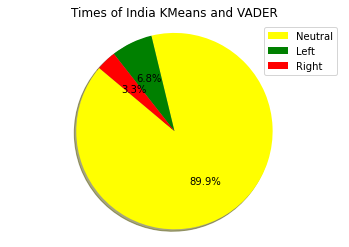

In [122]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df1[df1['Bias1'] == -1])
left = len(df1[df1['Bias1'] == 0])
right = len(df1[df1['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Times of India KMeans and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/TOI_Bias1.png')
plt.show()

Bias by textblob.

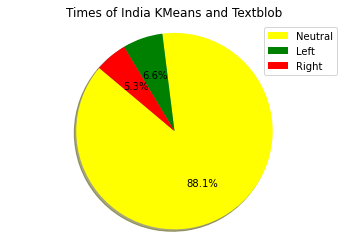

In [123]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df1[df1['Bias2'] == -1])
left = len(df1[df1['Bias2'] == 0])
right = len(df1[df1['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Times of India KMeans and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/TOI_Bias2.png')
plt.show()

### DBScan data.

In [124]:
df11 = pd.read_csv("Publications/Edit/DBS/TOI_new.csv")
df11.head()

,publish_date,headline_category,headline_text,Label,Party,sent1,Bias1,sent2,Bias2
0,20170417,city.indore,HC on alleged Simhastha irregularities: Take i...,0,0,neu,-1,0,-1
1,20181014,city.bhopal,Rahul to visit Datia; Gwalior from Monday,0,0,neu,-1,0,-1
2,20170920,sports.football,Premier Futsal: Bengaluru Royals rout Mumbai W...,0,0,neu,-1,0,-1
3,20090824,city.mysuru,Assembly session will focus on people's proble...,0,0,neu,-1,0,-1
4,20110801,city.ranchi,Nine die in lightning strikes,0,0,neg,1,0,-1


Bias by vader.

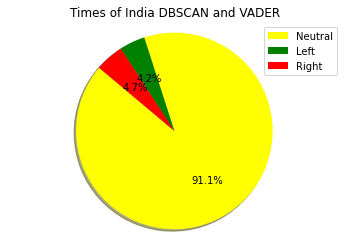

In [125]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df11[df11['Bias1'] == -1])
left = len(df11[df11['Bias1'] == 0])
right = len(df11[df11['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Times of India DBSCAN and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/TOI_Bias1.png')
plt.show()

Bias by textblob.

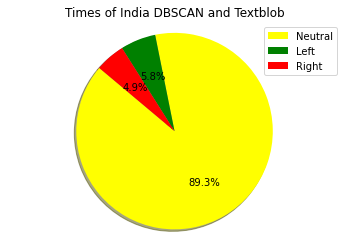

In [126]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df11[df11['Bias2'] == -1])
left = len(df11[df11['Bias2'] == 0])
right = len(df11[df11['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Times of India DBSCAN and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/TOI_Bias2.png')
plt.show()

## Quint. 

### KMeans data.

In [127]:
df2 = pd.read_csv("Publications/Edit/KMeans/QT_new.csv")
df2.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Pushpesh Pant,Swami Vivekananda ranks among the highest in t...,2018-07-03,"Swami Vivekananda,Hinduism,Tolerance,Politics ...",Swami Vivekananda’s 156th Birth Anniversary 20...,https://www.thequint.com/voices/opinion/swami-...,quint,0,1,neu,-1,0,-1
1,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,5,1,neu,-1,0,-1
2,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,0,1,neu,-1,0,-1
3,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,0,1,neu,-1,0,-1
4,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,0,1,neu,-1,0,-1


Bias by vader.

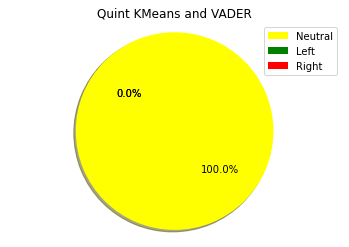

In [128]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df2[df2['Bias1'] == -1])
left = len(df2[df2['Bias1'] == 0])
right = len(df2[df2['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Quint KMeans and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/QT_Bias1.png')
plt.show()

Bias by textblob.

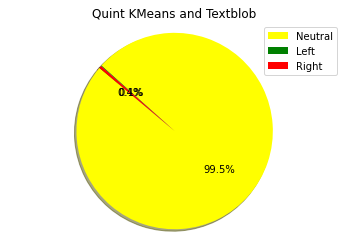

In [129]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df2[df2['Bias2'] == -1])
left = len(df2[df2['Bias2'] == 0])
right = len(df2[df2['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Quint KMeans and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/QT_Bias2.png')
plt.show()

### DBScan data.

In [130]:
df22 = pd.read_csv("Publications/Edit/DBS/QT_new.csv")
df22.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint,-1,0,neu,-1,0,-1
1,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint,-1,0,neu,-1,0,-1
2,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint,-1,0,neu,-1,0,-1
3,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint,-1,0,neu,-1,0,-1
4,The Quint,"Purnendu Pritam With heavy rains, thunderstorm...",2018-06-14,"Assam,United States,AIADMK,QWrap,FIFA,Anand L ...","Today’s News in Videos: Rains, Thunderstorms, ...",https://www.thequint.com/videos/news-videos/la...,quint,-1,0,neu,-1,0,-1


Bias by vader.

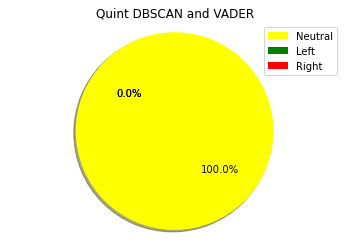

In [131]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df22[df22['Bias1'] == -1])
left = len(df22[df22['Bias1'] == 0])
right = len(df22[df22['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Quint DBSCAN and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/QT_Bias1.png')
plt.show()

Bias by textblob.

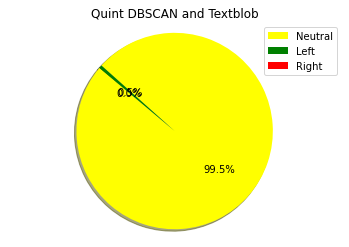

In [132]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df22[df22['Bias2'] == -1])
left = len(df22[df22['Bias2'] == 0])
right = len(df22[df22['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Quint DBSCAN and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/QT_Bias2.png')
plt.show()

## First Post. 

### KMeans data. 

In [133]:
df3 = pd.read_csv("Publications/Edit/KMeans/FP_new.csv")
df3.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Press Trust of India,Chief Minister Arvind Kejriwal on Wednesday or...,2018-11-29,"AAP,Arvind Kejriwal,BJP,Delhi,Imran Hussain,Mo...",Arvind Kejriwal orders suspension of Delhi foo...,https://www.firstpost.com/politics/arvind-kejr...,firstpost,0,0,neu,-1,0,-1
1,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,7,1,neu,-1,0,-1
2,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,7,1,neu,-1,0,-1
3,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,7,1,neu,-1,0,-1
4,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,13,0,neu,-1,0,-1


Bias by vader.

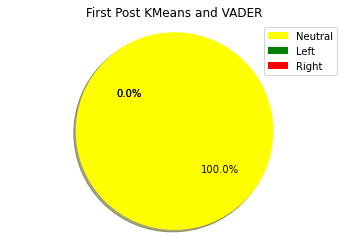

In [134]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df3[df3['Bias1'] == -1])
left = len(df3[df3['Bias1'] == 0])
right = len(df3[df3['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('First Post KMeans and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/FP_Bias1.png')
plt.show()

Bias by textblob.

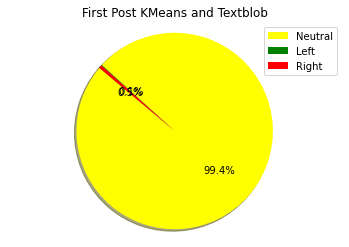

In [135]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df3[df3['Bias2'] == -1])
left = len(df3[df3['Bias2'] == 0])
right = len(df3[df3['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('First Post KMeans and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/FP_Bias2.png')
plt.show()

### DBScan data.

In [136]:
df33 = pd.read_csv("Publications/Edit/DBS/FP_new.csv")
df33.head()

,author,content,date,tag,title,url,website,Label,Party,sent1,Bias1,sent2,Bias2
0,Press Trust of India,Slamming the revision of GDP data under the U...,2018-11-29,"Anand Sharma,Arun Jaitley,BJP,Congress,GDP,Nar...",P Chidambaram calls revision of GDP data 'bad ...,https://www.firstpost.com/politics/p-chidambar...,firstpost,-1,0,neu,-1,0,-1
1,Press Trust of India,The HD Kumarawamy-led JD(S)-Congress ministry...,2018-11-29,"Congress,Dinesh Gundu Rao,G Parameshwara,HD Ku...",Karnataka cabinet will be expanded before 10 D...,https://www.firstpost.com/politics/karnataka-c...,firstpost,-1,0,neu,-1,0,-1
2,Press Trust of India,: All India Majlis-e-Ittehadul Muslimeen (AIMI...,2018-11-29,"AIMIM,All India Majlis-E-Ittehadul Muslimeen,A...","After Maharashtra Assembly passes quota bill, ...",https://www.firstpost.com/politics/after-mahar...,firstpost,-1,0,neu,-1,0,-1
3,Press Trust of India,: The Bharatiya Janata Party (BJP) Thursday co...,2018-11-29,"Bharatiya Janata Party,BJP,Congress,Gorakhpur,...",Uttar Pradesh BJP chief takes jibe at Rahul Ga...,https://www.firstpost.com/politics/uttar-prade...,firstpost,-1,0,neu,-1,0,-1
4,Indo-Asian News Service,"Calling Chief Minister K Chandrasekhar Rao ""K...",2018-11-29,"Assembly Election 2018,Bhupalpally,BJP-RSS,Con...","Rahul Gandhi calls KCR 'Khao Commission Rao', ...",https://www.firstpost.com/politics/rahul-gandh...,firstpost,-1,0,neu,-1,0,-1


Bias by vader.

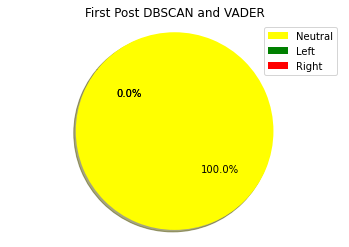

In [138]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df33[df33['Bias1'] == -1])
left = len(df33[df33['Bias1'] == 0])
right = len(df33[df33['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('First Post DBSCAN and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/FP_Bias1.png')
plt.show()

Bias by textblob.

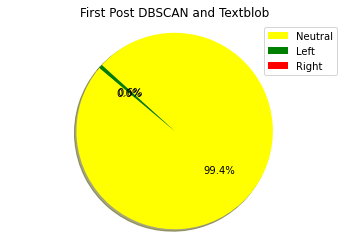

In [139]:
labels = 'Neutral', 'Left', 'Right'
neu = len(df33[df33['Bias2'] == -1])
left = len(df33[df33['Bias2'] == 0])
right = len(df33[df33['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('First Post DBSCAN and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/FP_Bias2.png')
plt.show()